# The Breast Cancer dataset


In [1]:
# Install library
#!pip install missingno

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.datasets import load_breast_cancer
import missingno as msno 

In [3]:
cancer = load_breast_cancer()
df1 = pd.DataFrame(data=cancer.data, columns=cancer.feature_names) # convert breast cancer data to Dataframe
df1["target"]=cancer.target

In [4]:
print(f'The shape of the dataset is: {df1.shape}')

The shape of the dataset is: (569, 31)


#### Data description 

In [5]:
cancer.DESCR # info regarding the dataset 

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [6]:
df1.head(10) # take a look at the data 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [7]:
df1.dtypes # explore the data types per feature 

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

All the data are numeric apart from the target which is Categorical and we are trying to predict through a classification model.

#### Descriptive Statistics per feature 

In [8]:
df1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


From the figures we can conlude that the data need scaling.

#### Print descriptive statistics in a more interpretable way 

In [9]:
df1.describe().T.style.bar(
    subset=["mean"], color="#205ff2").background_gradient(subset=["std"], cmap="Reds").background_gradient(
    subset=["50%"], cmap="coolwarm")

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
mean texture,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
mean perimeter,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
mean area,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
mean smoothness,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
mean compactness,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
mean concavity,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
mean concave points,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
mean symmetry,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
mean fractal dimension,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


##### Class distribution

In [10]:
df1.target.value_counts() #Class Distribution: 212 - Malignant (0), 357 - Benign (1)

1    357
0    212
Name: target, dtype: int64

In [11]:
print("The dataset is unblanced since the {:.2f}% is classified as Benign".format((357/(df1.shape[0]))*100))

The dataset is unblanced since the 62.74% is classified as Benign


Thus the accuracy as a metric is not a very good metric for two reasons:
* Unbalanced dataset 
* importance of class, since we are trying to predict cancer

#### Plot the histographs and density plots for every attribute of the dataset 

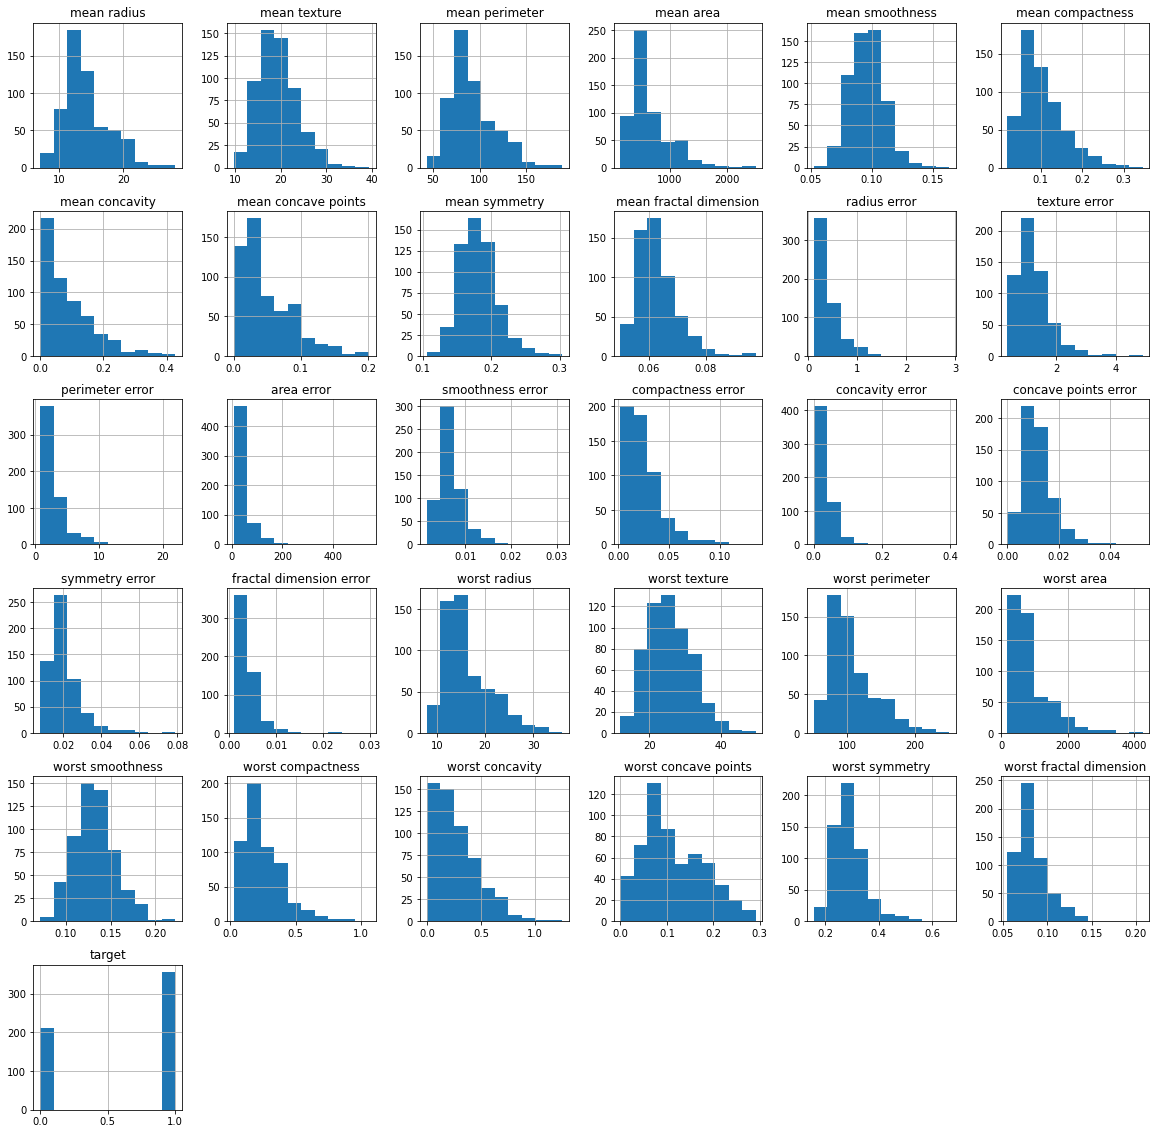

In [12]:
plt.rcParams["figure.figsize"] = (20,20)
df1.hist()
plt.show()

We can see that many features like worst concavity, worst compactness,mean concavity and compactness error display skewness to the right.

If most of the data are on the left side of the histogram but a few larger values are on the right, the data are said to be skewed to the right. Data that are skewed to the right. The few larger values bring the mean upwards but don’t really affect the median. So when data are skewed right, the mean is larger than the median.

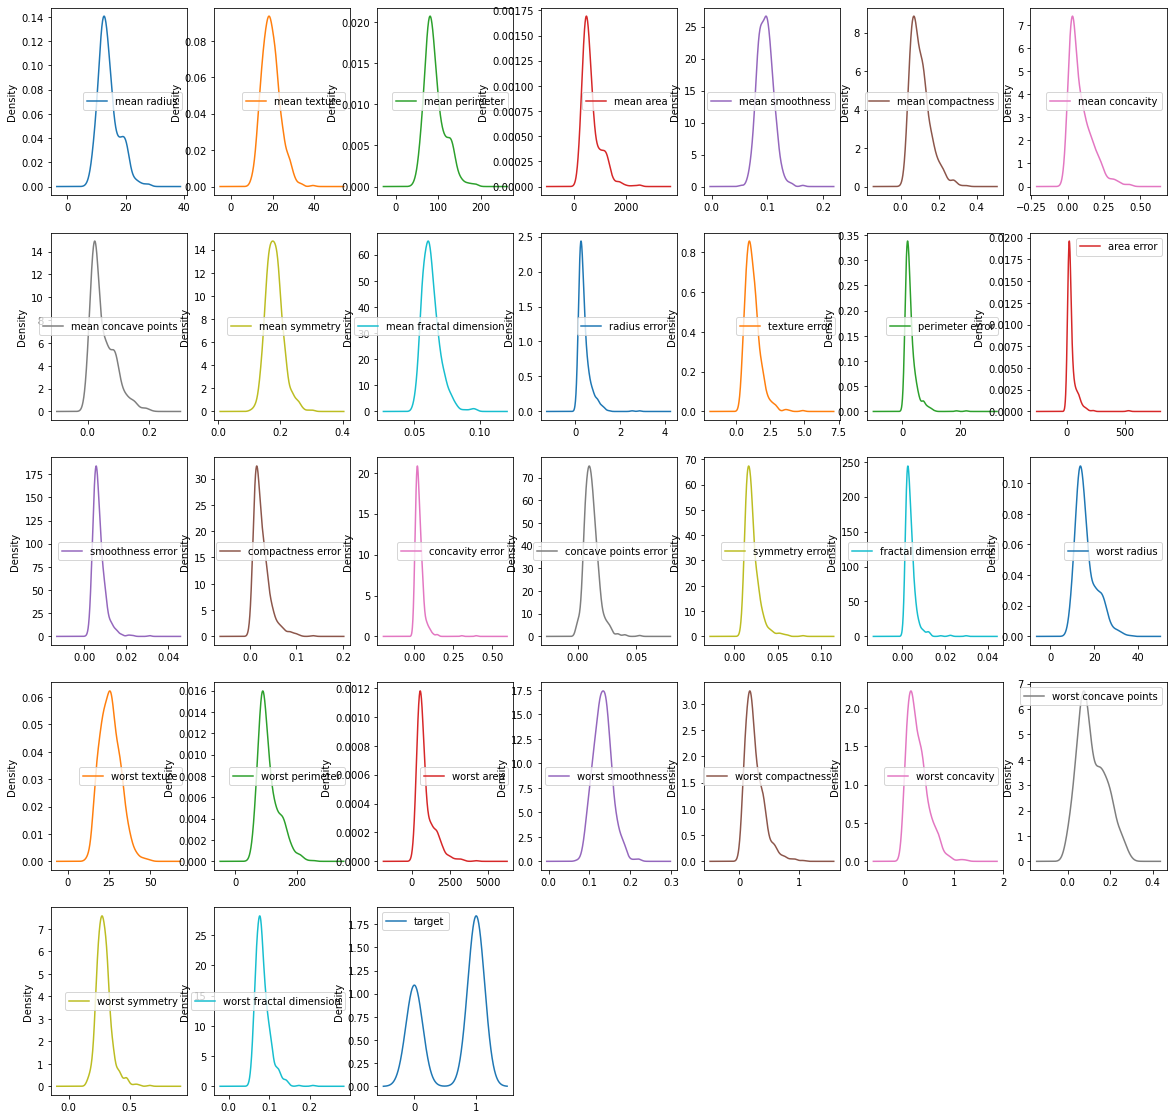

In [13]:
df1.plot(kind='density', subplots=True, layout=(5,7), sharex=False)
plt.show()

From the distplots it is obvious that we need to apply feature scaling. Indicatively, worst area takes values up to 4.254, while mean concavity up to 0.43. Every algorithm will be affected by the huge difference and driven by higher values. We can tackle this by applying feature scaling.   

##### Searching for missing values 

<AxesSubplot:>

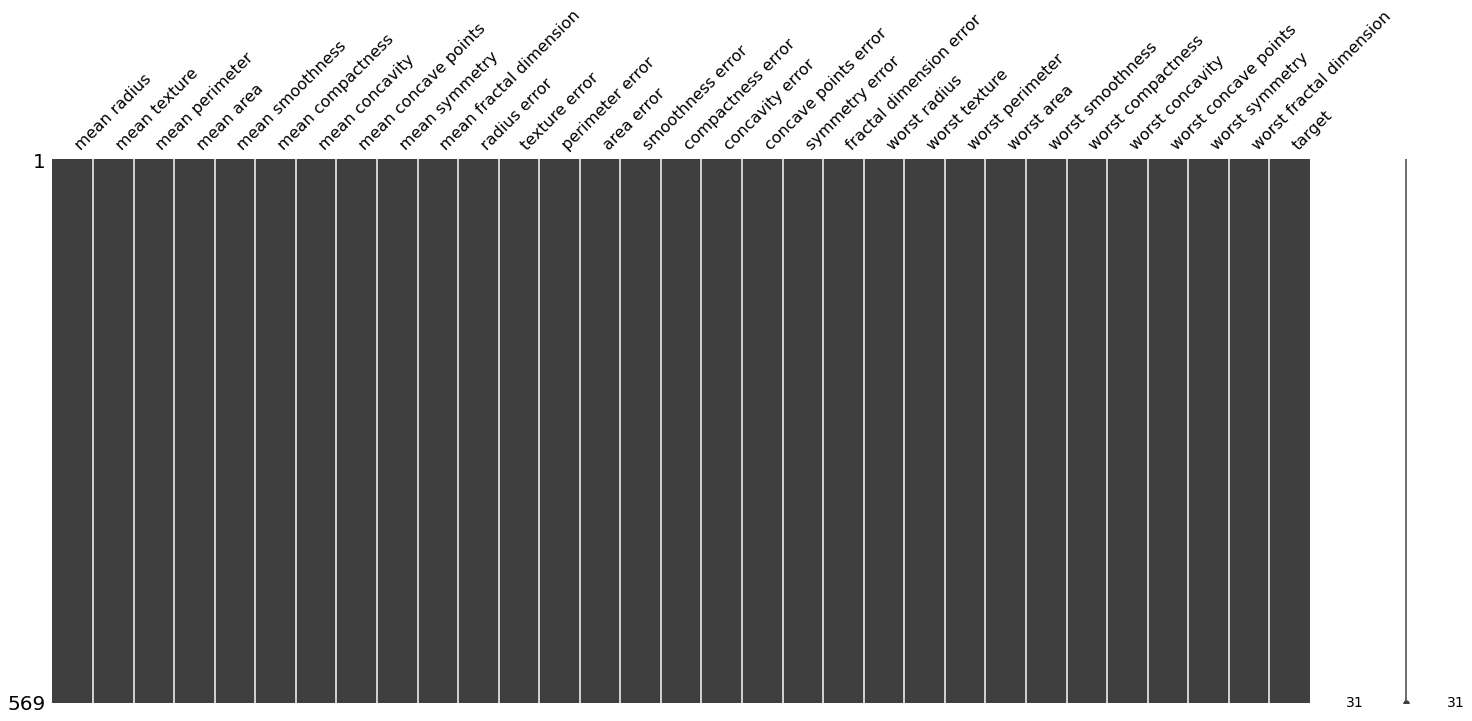

In [15]:
msno.matrix(df1)

In [16]:
df1.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [17]:
df1.target[df1.target.isnull()] ## If there were missing values it would return a slice of the dataset with missing values for examination. Examination is necessary in order to decide how to handle missing values

Series([], Name: target, dtype: int32)

In [18]:
df1.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

From the figures above we can see that there are not any null/na values in the dataset 

#### Searching for duplicates in the dataset  

In [19]:
duplicate_values = df1[df1.duplicated()]

In [20]:
duplicate_values

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


There are not any duplicated values in the dataset 

#### Searching for outliers 

There are various ways of finding the outliers: 

* Using scatter plots
* Using Boxplots
* Using z-score (3σ)
* Using the IQR interquartile range 

In [ ]:
Q1, Q3 = np.percentile(df1,[25,75]) # In case we need to remove outliers 
IQR = Q3 - Q1
lower_bound = Q1 - (1.5* IQR)   ## The bounds to slice the dataframe
upper_bound = Q3 + (1.5* IQR)   ## We could keep the values inside those boundaries 

###### Boxplots 

In [ ]:
df1.plot(kind='box', subplots=True, layout=(5,7), sharex=False, sharey=False)
plt.show()

In [ ]:
f = plt.figure(figsize=(18,8))
sns.boxplot(data=df1)

From the boxplot someone can infer that there are outliers in the dataset, however since we do not have the expert judgment for medical data and might hold important information for finding cancer patterns, we decide to keep all the data. 

#### Correlation matrices

In [ ]:
corrM = df1.corr()

In [ ]:
corrM

##### Linear Correlation test - Pearson 

In [ ]:
correlation = df1.corr(method='pearson')
columns = correlation.nlargest(30,'target').index
columns

In [ ]:
f = plt.figure(figsize=(19, 15))
correlation_map = np.corrcoef(df1[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

##### Monotonic Correlation test - Spearman 

In [ ]:
correlation = df1.corr(method='spearman')
columns = correlation.nlargest(30,'target').index
columns

In [ ]:
f = plt.figure(figsize=(19, 15))
correlation_map = np.corrcoef(df1[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

Values above 0,5 and below -0,5 indicate correlation 

In [ ]:
corrM = df1.corr()
a = corrM[(corrM['target']< - 0.5) | (corrM['target'] > 0.5)]['target'].index.to_list()

a

Correlation measures the relationship between two quantitative variables. We performed two tests for correlation the pearson and spearman.<br />

<font size="3">**Pearson Correlation**</font> <br />
 The measure can vary between **-1** and **1**, where **-1** means total negative correlation while **1** means total positive correlation. Pearson correlation identifies linear relationship. It has to be mentioned that it assumes Gaussian distribution in the variables. 
 
 
<font size="3">**Spearman Correlation**</font> <br />
 The measure can vary between **-1** and **1**, where **-1** means total negative correlation while **1** means total positive correlation. Pearson correlation identifies both linear and non-linear relationships.


From the correlation tests we can conclude from both tests that the target is correlated with features:

* 'mean radius',
*  'mean perimeter',
* 'mean area',
* 'mean compactness',
* 'mean concavity',
* 'mean concave points',
* 'radius error',
* 'perimeter error',
* 'area error',
* 'worst radius',
* 'worst perimeter',
* 'worst area',
* 'worst compactness',
* 'worst concavity',
* 'worst concave points'

Additionally with correlation test we can derive relationships among the features. If we take into consideration correlated features in the model we will face the problem of multicollinearity. Two highly correlated features, will cause redundant information (noise) concernig the target.

In [ ]:
from pandas.plotting import scatter_matrix
f = plt.figure(figsize=(18,10))
scatter_matrix(df1)
plt.xticks(rotation=45) # rotate x-axis labels by 45 degrees
plt.yticks(rotation=90)
plt.show()

From the above scatter plot we can see the existence of  several linear correlations among features.

##### Checking for skewness 

In [ ]:
df1.skew()

* If the skewness is between **-0.5 and 0.5**, the data are fairly **symmetrical**

* If the skewness is between **-1 and - 0.5** or between **0.5 and 1**, the data are **moderately skewed**
* If the skewness is less than **-1 or greater than 1**, the data are **highly skewed**

##### Checking for kyrtosis  

In [ ]:
df1.kurtosis()

* If the distribution is tall and thin it is called a leptokurtic distribution(**Kurtosis > 3**). Values in a **leptokurtic** distribution are near the mean or at the extremes.
* A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(**Kurtosis <3**) distribution.
* A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(__Kurtosis=3__) distribution. A __mesokurtic__ distribution looks more close to a normal distribution.

**High kurtosis in a data set is an indicator that data has heavy outliers.**


**Low kurtosis in a data set is an indicator that data has lack of outliers.**


Thus, radius error, perimeter error, area error, smoothness error, concavity error, fractal dimension error are expected to have outliers, as shown from the boxplots above.

## Normality Tests

##### Shapiro-Wilk Test

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df1)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: print('Probably Gaussian')
else: print('Probably not Gaussian')

##### D’Agostino’s K^2 Test

###### We can not use this hypothesis because it handles a table of one size.

In [ ]:
from scipy.stats import normaltest
stat, p = normaltest(df1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

## Chi-Squared Test

##### Tests whether two categorical variables are related or independent.

##### Assumptions

    Observations used in the calculation of the contingency table are independent.

##### Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.

In [ ]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(df1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:print('Probably independent')
else:print('Probably dependent')

In [ ]:
m = df1[df1['target'] == '0']
b = df1[df1['target'] == '1']

In [ ]:
m['mean radius'].hist(figsize = (15, 8), alpha = 0.4, label = 'Malignant')
b['mean radius'].hist(figsize = (15, 8), alpha = 0.4, label = 'Benign')
plt.legend()

In [ ]:
df1['mean radius'].hist(figsize = (15, 8))

##### Seperate dataset into features and output 

In [23]:
values = df1.values

X = values[:,0:30]
Y = values[:,30]

#### Using Chi squared

In [24]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#names 
names = df1.columns[:-1]


# feature extraction
test = SelectKBest(score_func=chi2, k="all")
fit = test.fit(X, Y)

# summarize scores
np.set_printoptions(precision=3)
print("Fit scores:")
print(fit.scores_)
print(names)
for i,j in zip(names,fit.scores_):
    print("Feature: "+i+" score: ",j)
    
print("Selected features: plas, test, mass and age")
features = fit.transform(X)

# summarize selected features
print("\n Summarise selected features:")
print(features[0:5,:])

Fit scores:
[2.661e+02 9.390e+01 2.011e+03 5.399e+04 1.499e-01 5.403e+00 1.971e+01
 1.054e+01 2.574e-01 7.431e-05 3.468e+01 9.794e-03 2.506e+02 8.759e+03
 3.266e-03 6.138e-01 1.045e+00 3.052e-01 8.036e-05 6.371e-03 4.917e+02
 1.744e+02 3.665e+03 1.126e+05 3.974e-01 1.931e+01 3.952e+01 1.349e+01
 1.299e+00 2.315e-01]
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
Feature: mean radius 

## Recursive feature elimination with cross-validation

Optimal number of features : 17


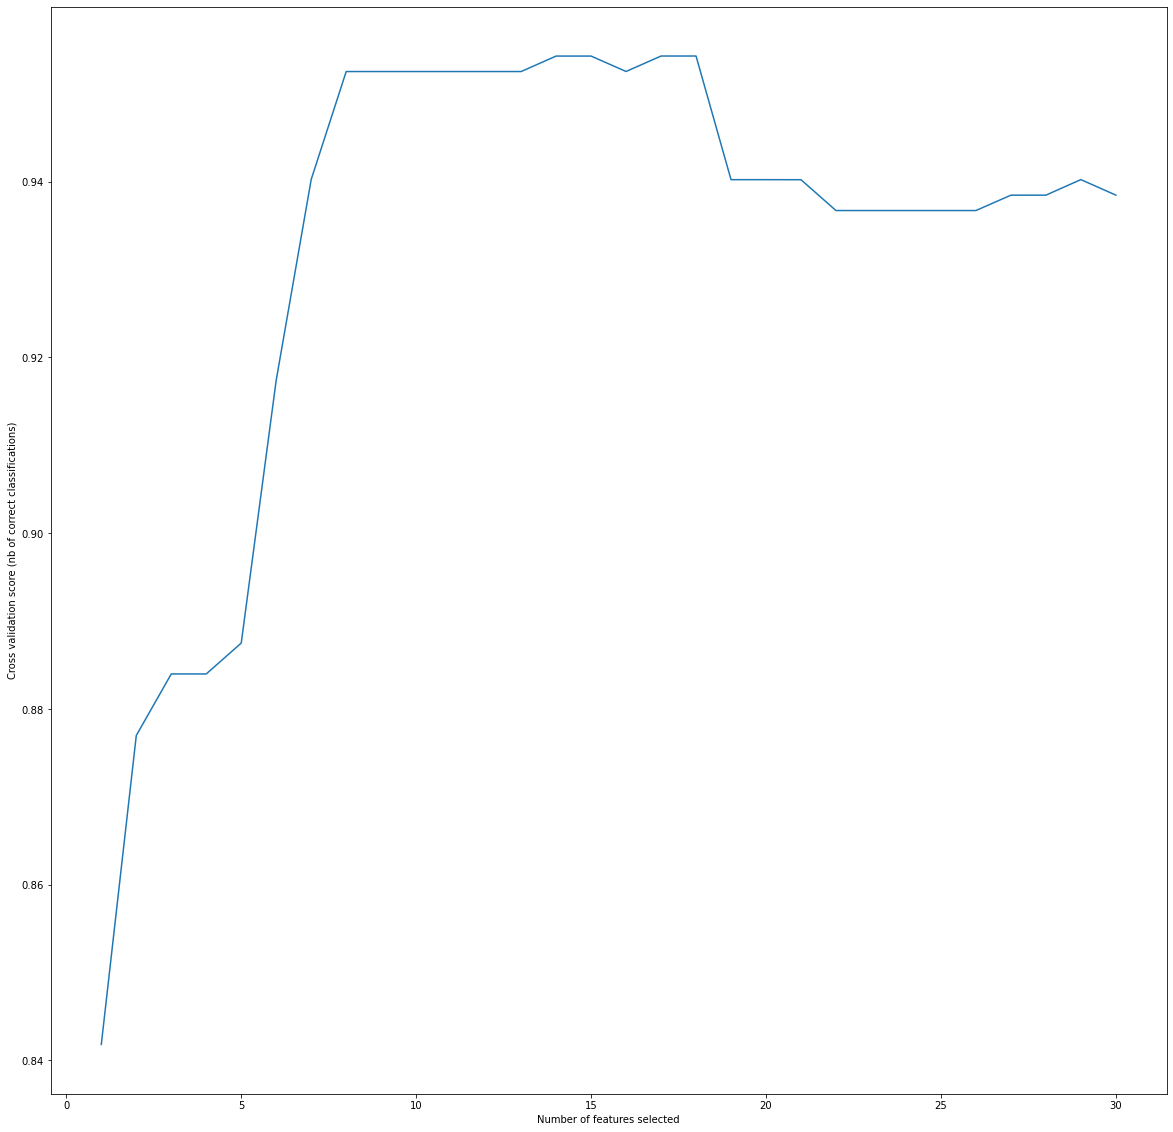

In [25]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
x, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, Y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Feature Importance 

In [26]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)
print(model.feature_importances_)

[0.045 0.02  0.061 0.067 0.008 0.02  0.057 0.072 0.008 0.006 0.022 0.006
 0.023 0.033 0.006 0.008 0.007 0.008 0.005 0.005 0.096 0.03  0.074 0.088
 0.022 0.039 0.042 0.094 0.012 0.014]


In [27]:
print("")
for i,j in zip(names, model.feature_importances_):
    print("Feature: "+i+" importance: ",j)


Feature: mean radius importance:  0.04520406005218849
Feature: mean texture importance:  0.02035311242437525
Feature: mean perimeter importance:  0.060559150427544894
Feature: mean area importance:  0.06744879595882727
Feature: mean smoothness importance:  0.008342263986450714
Feature: mean compactness importance:  0.01991729987840474
Feature: mean concavity importance:  0.05731248343081708
Feature: mean concave points importance:  0.0723488637309865
Feature: mean symmetry importance:  0.007816966970938265
Feature: mean fractal dimension importance:  0.005936876720912182
Feature: radius error importance:  0.0222204818093217
Feature: texture error importance:  0.005517895506186278
Feature: perimeter error importance:  0.023084478954537736
Feature: area error importance:  0.0334248118958114
Feature: smoothness error importance:  0.005993507875406361
Feature: compactness error importance:  0.00824721607735206
Feature: concavity error importance:  0.007265542840307884
Feature: concave poi

In [28]:
im = pd.DataFrame( model.feature_importances_, names)

im = im.sort_values(0, ascending =False)

im[:17] ## Show 17 best features based on feature selextion results 

,0
worst radius,0.095827
worst concave points,0.093603
worst area,0.088197
worst perimeter,0.074089
mean concave points,0.072349
mean area,0.067449
mean perimeter,0.060559
mean concavity,0.057312
mean radius,0.045204
worst concavity,0.042027


##### Feature Scaling 

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialize scaler 
scaler.fit(X) # learn the necessary info from data 
X_scaled  = scaler.fit_transform(X) # apply scaling 

In [30]:
df_scaled = pd.DataFrame(X_scaled)

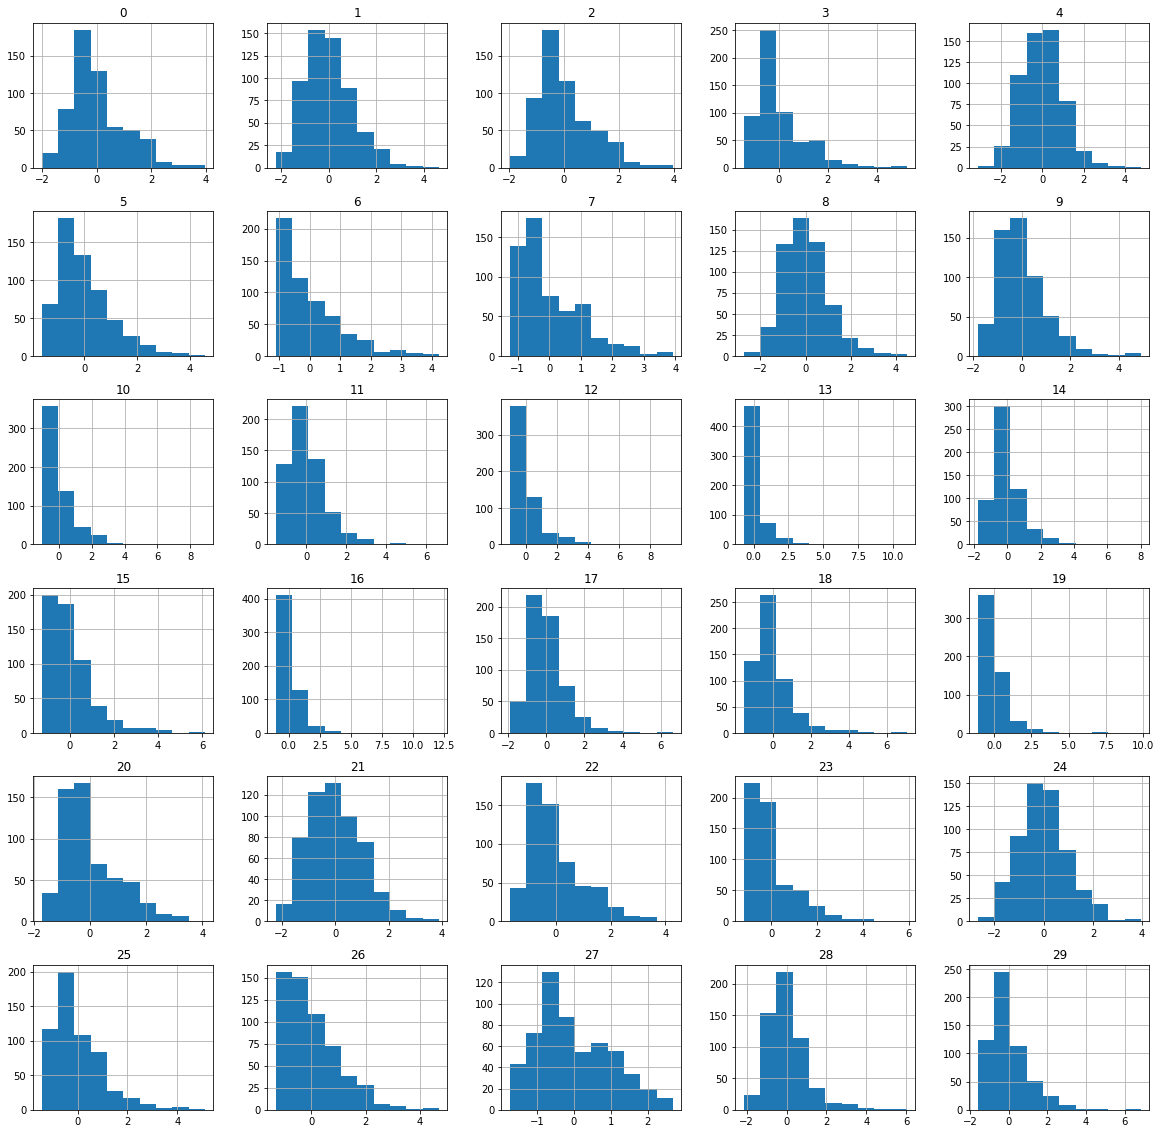

In [31]:
plt.rcParams["figure.figsize"] = (20,20)
df_scaled.hist()
plt.show()

After the application of feature scaling every feature is in the same scale.

#### Apply PCA 

The application of PCA is chosen in order to reduce dimensionality and colinearity  

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=17)
pca_all = PCA(n_components=30)

Xt = pca.fit_transform(X_scaled)
Xt_all = pca_all.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)
print(pca_all.explained_variance_ratio_)

[0.443 0.19  0.094 0.066 0.055 0.04  0.023 0.016 0.014 0.012 0.01  0.009
 0.008 0.005 0.003 0.003 0.002]
[4.427e-01 1.897e-01 9.393e-02 6.602e-02 5.496e-02 4.025e-02 2.251e-02
 1.589e-02 1.390e-02 1.169e-02 9.797e-03 8.705e-03 8.045e-03 5.234e-03
 3.138e-03 2.662e-03 1.980e-03 1.754e-03 1.649e-03 1.039e-03 9.991e-04
 9.146e-04 8.114e-04 6.018e-04 5.160e-04 2.726e-04 2.300e-04 5.298e-05
 2.496e-05 4.435e-06]


In [33]:
#!pip install xgboost

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall

# Try with pca and 17 principal components  

models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "accuracy"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, Xt, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))


 LR: 0.977863 (+/- 0.017495)
LDA: 0.951510 (+/- 0.027517)
kNN: 0.968709 (+/- 0.020570)
 DT: 0.930445 (+/- 0.041785)
 NB: 0.894962 (+/- 0.040456)
SVM: 0.974699 (+/- 0.016150)
 RF: 0.946241 (+/- 0.028158)
 GB: 0.955363 (+/- 0.026087)
XGB: 0.960645 (+/- 0.025442)
AdaBoost: 0.970840 (+/- 0.021529)
ANN: 0.973985 (+/- 0.018037)


In [69]:
#def generate_data(n_samples=500, noise=0.1):
#    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise)
#    X = noisy_moons[0]
#    return X 

In [71]:
#def data():
#    n_samples = 60
#    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05,
#                                      random_state=1)
 #   X = noisy_moons[0]
 #   return X 
#X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

values = df1.values

X = values[:,0:30]
Y = values[:,30]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
X_shuffled,Y_shuffled = shuffle(X_train, Y_train, random_state=0)

X_noisy=np.concatenate((X_train, X_shuffled))
Y_noisy=np.concatenate((Y_train, Y_shuffled))

model = make_pipeline( StandardScaler(), KNeighborsClassifier(n_neighbors = 5) )

model.fit(X_noisy, Y_noisy)

print('accuracy with "noise": ',  model.score(X_test, Y_test))

accuracy with "noise":  0.9649122807017544


In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall

# Try with pca and 17 principal components  

models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "accuracy"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))

 LR: 0.950464 (+/- 0.028431)
LDA: 0.956065 (+/- 0.022556)
kNN: 0.933935 (+/- 0.028857)
 DT: 0.925852 (+/- 0.032805)
 NB: 0.938847 (+/- 0.028157)
SVM: 0.952237 (+/- 0.025295)
 RF: 0.959561 (+/- 0.027772)
 GB: 0.961328 (+/- 0.025595)
XGB: 0.968039 (+/- 0.022935)
AdaBoost: 0.962030 (+/- 0.021794)
ANN: 0.935345 (+/- 0.028624)


In [97]:
#Hypothesis
# Example of the Student's t-test
from scipy.stats import ttest_ind
nonoise = [0.977863,0.951510,0.968709,0.930445,0.894962,0.974699,0.946241,0.955363,0.960645,0.970840,0.973985]
noise = [ 0.950464, 0.956065,0.933935,0.925852, 0.938847,0.952237, 0.959561, 0.961328, 0.968039, 0.962030,0.935345]
stat, p = ttest_ind(nonoise,noise)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.658, p=0.518
Probably the same distribution


In [ ]:
#################################################################

In [ ]:
# Add noise into all features after pca 


def noise(X,noise=5):
    
    from noisify.recipes import human_error
    from noisify.recipes import machine_error

    combined_noise = machine_error(noise) + human_error(noise)
    X_noise = np.empty([Xt.shape[0], Xt.shape[1]])
    
    for i in range(X.shape[1]):
        col = X[:,i]
        nos = np.array(list(combined_noise(col)))
        X_noise[:,i] = nos
        
    return X_noise



In [ ]:
X_noise = noise(Xt)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall

# Try with pca and 17 principal components  

models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "accuracy"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_noise, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))


In [ ]:
X_noise2 = noise(Xt,10)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall

# Try with pca and 17 principal components  

models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "accuracy"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_noise2, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))


In [ ]:
X_noise3 = noise(Xt,3)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall

# Try with pca and 17 principal components  

models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "accuracy"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_noise3, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
